#BOSTON_HOUSE_PRICE_PREDECTION

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Boston-house-price-data.csv")

In [20]:
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [21]:
data.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [23]:
data.shape

(506, 14)

In [24]:
data.rename(columns = {'MEDV':'PRICE'},inplace = True)

In [25]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [26]:
data['PRICE'].value_counts()

50.0    16
25.0     8
22.0     7
21.7     7
23.1     7
        ..
32.9     1
34.6     1
30.3     1
33.3     1
8.1      1
Name: PRICE, Length: 229, dtype: int64

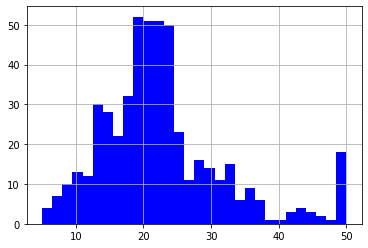

In [27]:
data['PRICE'].hist(bins =30,facecolor='b')

In [28]:
from sklearn import preprocessing as pp
cols=['CRIM','ZN','TAX','B']
col= pp.StandardScaler().fit_transform(data[cols])
col = pd.DataFrame(col,columns=cols)
col.head()

,CRIM,ZN,TAX,B
0,-0.419782,0.284830,-0.666608,0.441052
1,-0.417339,-0.487722,-0.987329,0.441052
2,-0.417342,-0.487722,-0.987329,0.396427
3,-0.416750,-0.487722,-1.106115,0.416163
4,-0.412482,-0.487722,-1.106115,0.441052


In [29]:
corr = data.corr()
corr.shape

(14, 14)

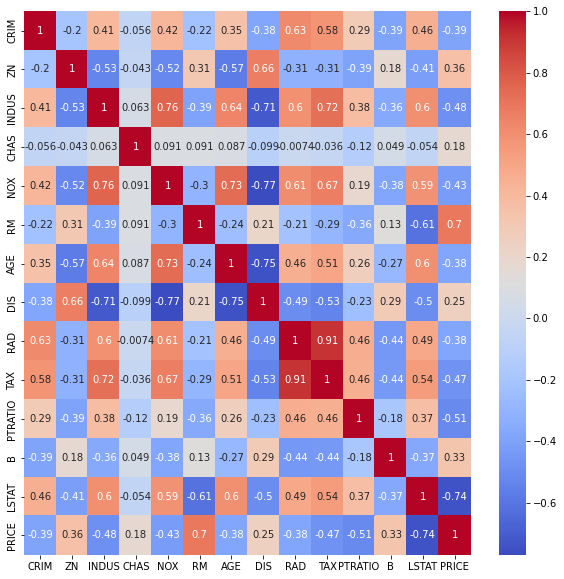

In [30]:
plt.figure(figsize = (10,10))
sns.heatmap(corr, annot= True, cmap='coolwarm')

Regression plot

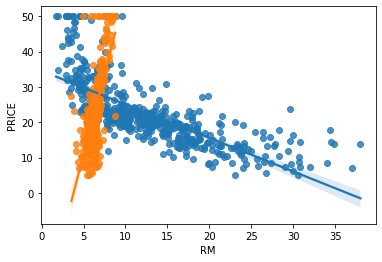

In [31]:
n = ['LSTAT', 'RM']
for i in n:
  sns.regplot(y=data['PRICE'],x = data[i])

In [32]:
from sklearn.model_selection import train_test_split

y=data['PRICE']
X = data.drop('PRICE',axis=1)

In [33]:
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.2,random_state=42)

In [35]:
#linear regression accuracy
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)
LinearRegression(copy_X=True, fit_intercept=True ,normalize=False)
y_pred=model.predict(X_train)
print("accuracy:",model.score(X_train,y_train)*100)

Training accuracy: 75.08856358979672


In [36]:
print("accuracy: ", model.score(X_val,y_val)*100)

accuracy:  66.8759493535633


In [34]:
#randomforestregressor
from sklearn.ensemble import RandomForestRegressor
reg=RandomForestRegressor()
reg.fit(X_train,y_train)
y_pred=reg.predict(X_train)
print("accuracy:",reg.score(X_train,y_train)*100)

Training accuracy: 97.50043275590427


In [37]:
print("Accuracy: ",reg.score(X_val, y_val)*100)

Accuracy:  88.2108028363777


More accuracy is optained from Random Forest as 88.21%